In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Tabla de datos

In [38]:
df = pd.read_csv("data.csv", sep=" ")
df

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6
0,SI,SI,5,14,21000,275
1,NO,NO,8,20,30000,313
2,NO,SI,24,52,78000,30
3,SI,SI,32,68,102000,342
4,NO,SI,3,10,15000,279
5,SI,NO,24,52,78000,348
6,SI,NO,7,18,27000,285
7,NO,SI,8,20,30000,32
8,NO,NO,12,28,42000,326
9,SI,NO,34,72,108000,301


---

## Ejercicio 1
Determinar la dependencia/independencia de los atributos nominales **Atr1** y **Atr2** de acuerdo al valor χ2
(el valor de referencia para aceptar la hipótesis de
independencia es χ
2
<3.84 con un grado de confianza del 95%). ¿Qué decisión de
pre-procesamiento tomarías tras este análisis?

---

## Ejercicio 2
Determinar la dependencia/independencia de los atributos numéricos **Atr3** y **Atr4** de acuerdo al coeficiente de correlación. ¿Qué decisión de preprocesamiento tomarías tras este análisis?

In [23]:
#np.corrcoef(atr3, atr4)
df["Atr3"].corr(df["Atr4"])

1.0

> El coeficiente de correlación es `1.0`. La decisión de preprocesamiento que tomaría es eliminar cualquiera de las dos variables porque son linealmente dependientes.
>
> Además visualmente se ve la dependencia:

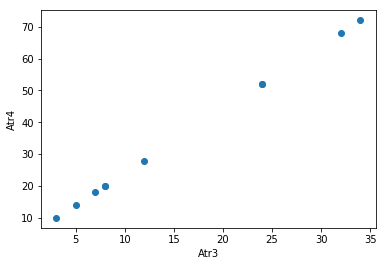

In [25]:
atr3 = df["Atr3"].values
atr4 = df["Atr4"].values

plt.scatter(atr3, atr4)
plt.xlabel("Atr3")
plt.ylabel("Atr4")
plt.show()

---

## Ejercicio 3
Indica la expresión que usarías para llevar a cabo la normalización lineal
uniforme al intervalo [0,1] de los atributos **atr4** y **atr5**. ¿Por qué es importante la normalización de los atributos si vamos a trabajar con distancias?


> `x normalzado = (x-x.min) / (x.max-x.min) * (1-0)+0`
>
> Lo que equivale a:
>
> `x normalzado = (x-x.min) / (x.max-x.min)`

In [27]:
atr4 = df["Atr4"].values
atr5 = df["Atr5"].values

atr4_norm = (atr4 - atr4.min()) / (atr4.max() - atr4.min())
atr5_norm = (atr5 - atr5.min()) / (atr5.max() - atr5.min())

print("Atributo 4 normalizado en [0,1]:\n", atr4_norm)
print("\nAtributo 5 normalizado en [0,1]:\n", atr5_norm)

Atributo 4 normalizado en [0,1]:
 [0.06451613 0.16129032 0.67741935 0.93548387 0.         0.67741935
 0.12903226 0.16129032 0.29032258 1.        ]

Atributo 5 normalizado en [0,1]:
 [0.06451613 0.16129032 0.67741935 0.93548387 0.         0.67741935
 0.12903226 0.16129032 0.29032258 1.        ]


---

## Ejercicio 4
Discretizar el atributo **Atr6** en 3 intervalos de acuerdo al método Binning:
1. De igual **profundidad**: Aproximadamente el mismo número de ejemplos por grupo.
2. De igual **amplitud**: Divide el rango en N intervalos de igual tamaño.

In [52]:
atr6_ord = df["Atr6"].values.tolist()
atr6_ord.sort()

df2 = pd.DataFrame({'Atr6 ordenado': atr6_ord})

df2['a) Igual profundidad'] = pd.qcut(df2['Atr6 ordenado'], 3, labels=['low', 'medium', 'high'])
df2['b) Igual amplitud']    = pd.cut(df2['Atr6 ordenado'],  3, labels=['low', 'medium', 'high'])
df2

,Atr6 ordenado,a) Igual profundidad,b) Igual amplitud
0,30,low,low
1,32,low,low
2,275,low,high
3,279,low,high
4,285,medium,high
5,301,medium,high
6,313,medium,high
7,326,high,high
8,342,high,high
9,348,high,high


In [81]:
pd.cut(df2["Atr6 ordenado"], 3, precision=0).cat.categories


IntervalIndex([(30.0, 136.0], (136.0, 242.0], (242.0, 348.0]],
              closed='right',
              dtype='interval[float64]')

In [82]:
pd.qcut(df2["Atr6 ordenado"], 3, precision=0).cat.categories

IntervalIndex([(29, 279], (279, 313], (313, 348]],
              closed='right',
              dtype='interval[int64]')

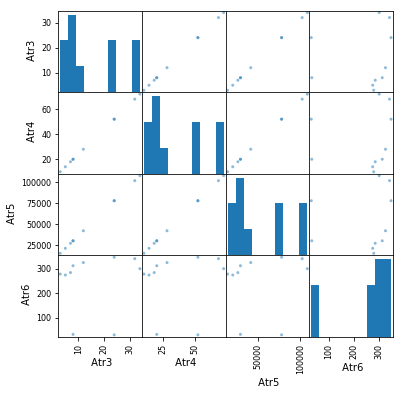

In [3]:
pd.plotting.scatter_matrix(df, figsize=(6, 6))
plt.show()